In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('C:/Users/DELL/OneDrive/Documents/data science asignments/PCA/PCA/Wine.csv')

 Basic Data Exploration:

In [4]:
# Shape of the dataset
print("Shape of the dataset:", data.shape)

# Data types
print("Data types:\n", data.dtypes)

# Missing values
print("Missing values:\n", data.isnull().sum())

Shape of the dataset: (178, 14)
Data types:
 Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object
Missing values:
 Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64


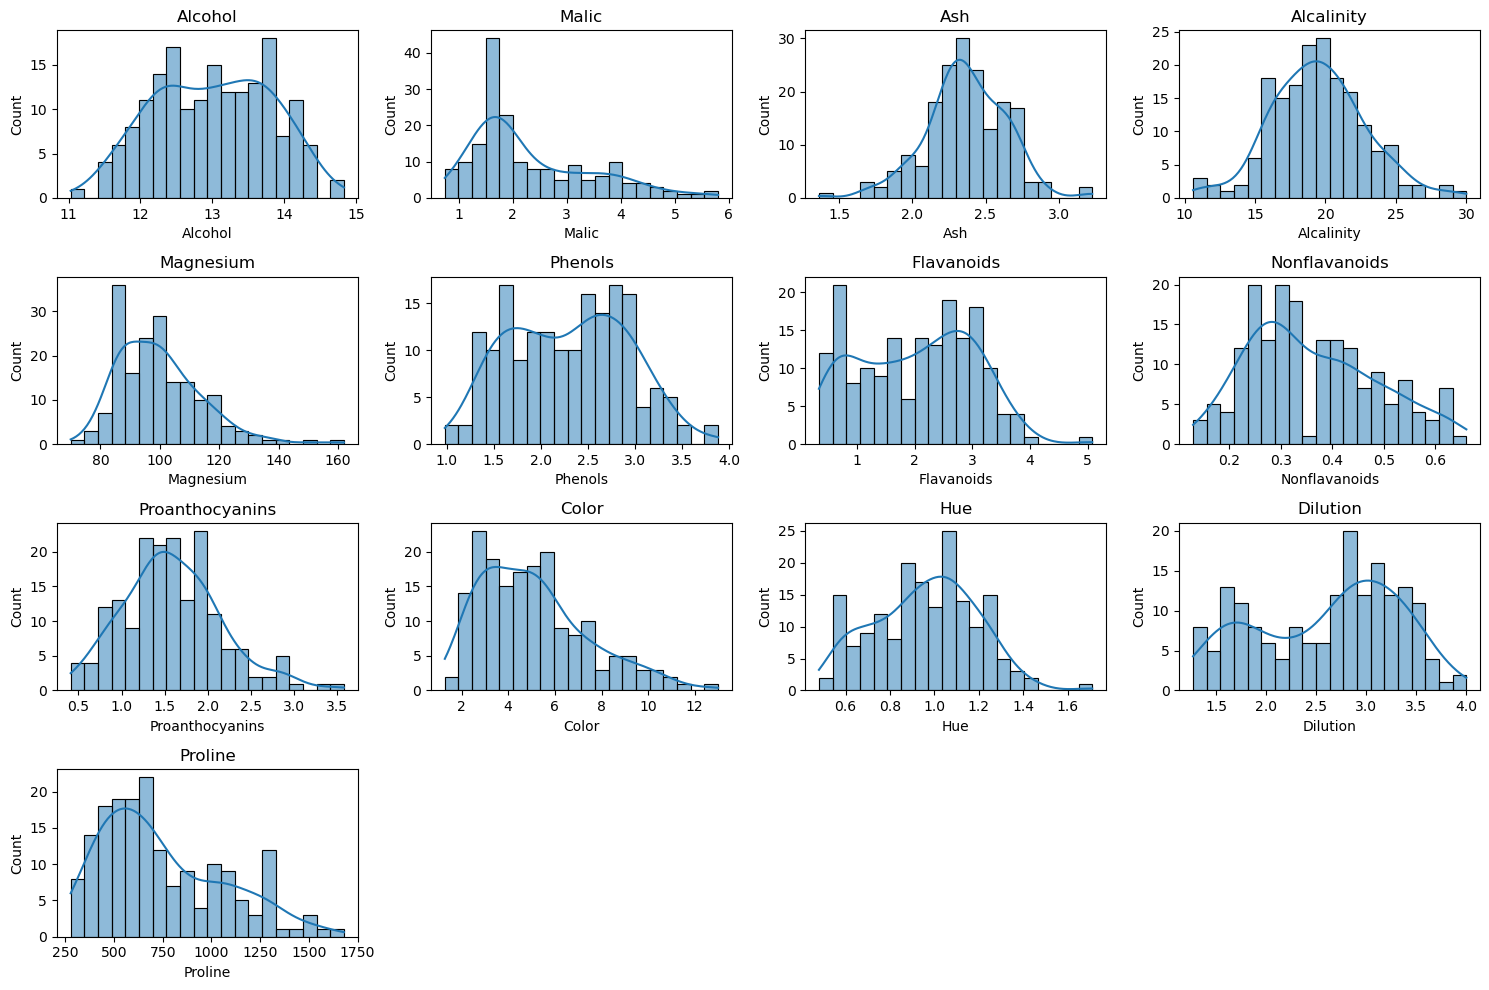

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Loop through each feature and create a histogram
for i, column in enumerate(data.columns[1:], 1):  # Skip the first column 'Type'
    plt.subplot(4, 4, i)
    sns.histplot(data[column], bins=20, kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

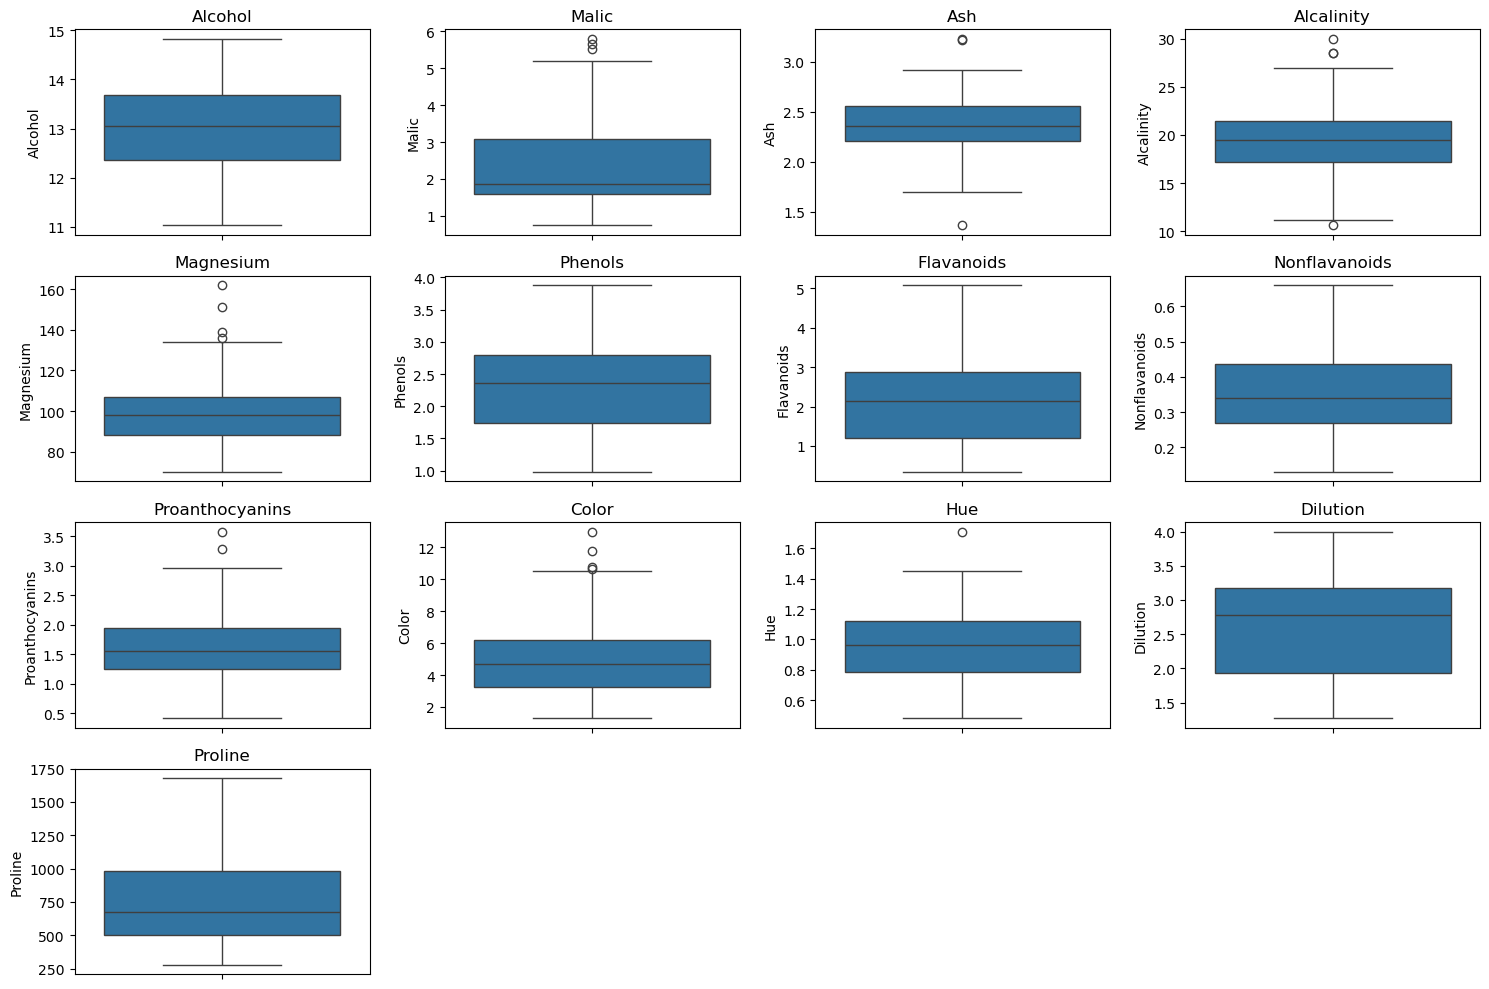

In [6]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[1:], 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

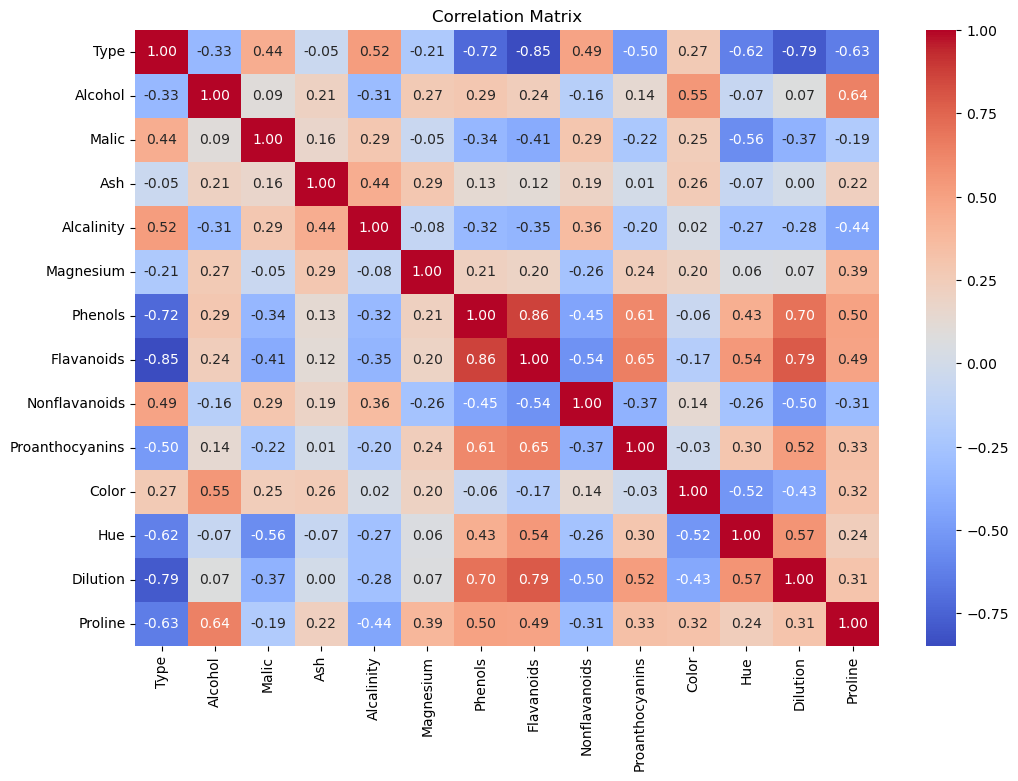

In [7]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Dimensionality Reduction with PCA:

In [9]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = data.drop('Type', axis=1)  # Assuming 'Type' is the target variable
y = data['Type']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the mean and standard deviation of standardized features
print("Mean of standardized features:\n", X_scaled.mean(axis=0))
print("Standard deviation of standardized features:\n", X_scaled.std(axis=0))

Mean of standardized features:
 [-8.38280756e-16 -1.19754394e-16 -8.37033314e-16 -3.99181312e-17
 -3.99181312e-17  0.00000000e+00 -3.99181312e-16  3.59263181e-16
 -1.19754394e-16  2.49488320e-17  1.99590656e-16  3.19345050e-16
 -1.59672525e-16]
Standard deviation of standardized features:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA
pca = PCA()

# Fit PCA on scaled data
pca.fit(X_scaled)

# Explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = explained_variance.cumsum()

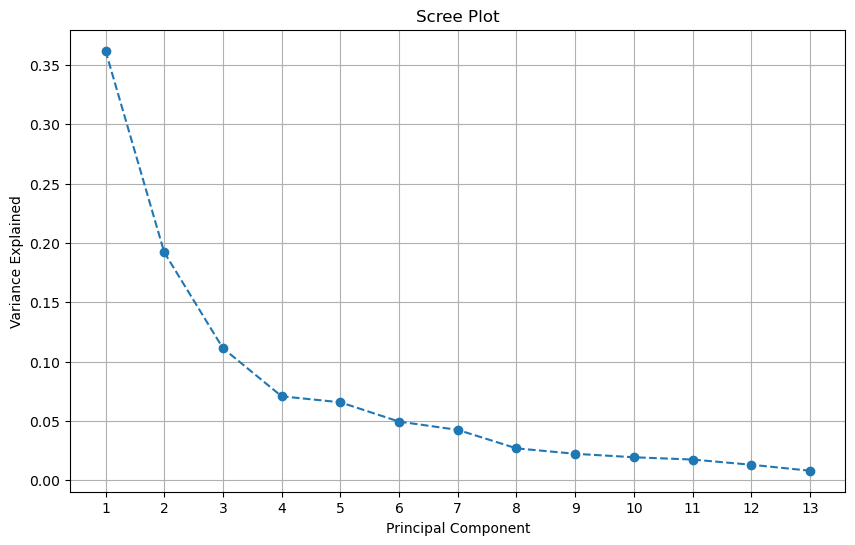

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

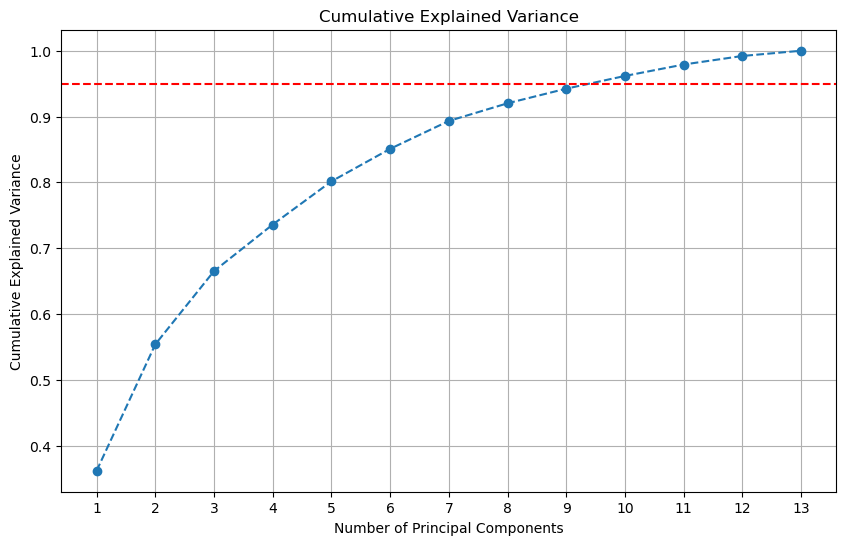

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.axhline(y=0.95, color='r', linestyle='--')  # Example threshold at 95%
plt.grid()
plt.show()

In [13]:
# Choose the number of components based on previous analysis (for example, n=5)
n_components = 5

# Initialize PCA with chosen number of components
pca = PCA(n_components=n_components)

# Transform the original dataset into principal components
X_pca = pca.fit_transform(X_scaled)

# Display the shape of transformed data
print("Shape of PCA-transformed data:", X_pca.shape)

Shape of PCA-transformed data: (178, 5)


3: Clustering with Original Data:


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

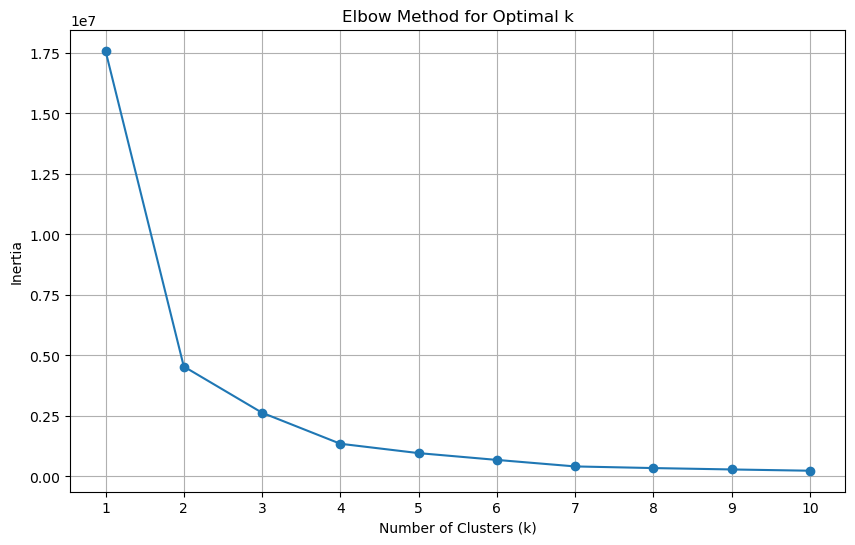

In [14]:
from sklearn.cluster import KMeans
import numpy as np

# Determine the optimal number of clusters using the Elbow method
inertia = []
K = range(1, 11)  # Testing cluster sizes from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow method
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(K)
plt.grid()
plt.show()

In [16]:
# Fit K-means with the chosen number of clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the original dataset
data['Cluster'] = clusters

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


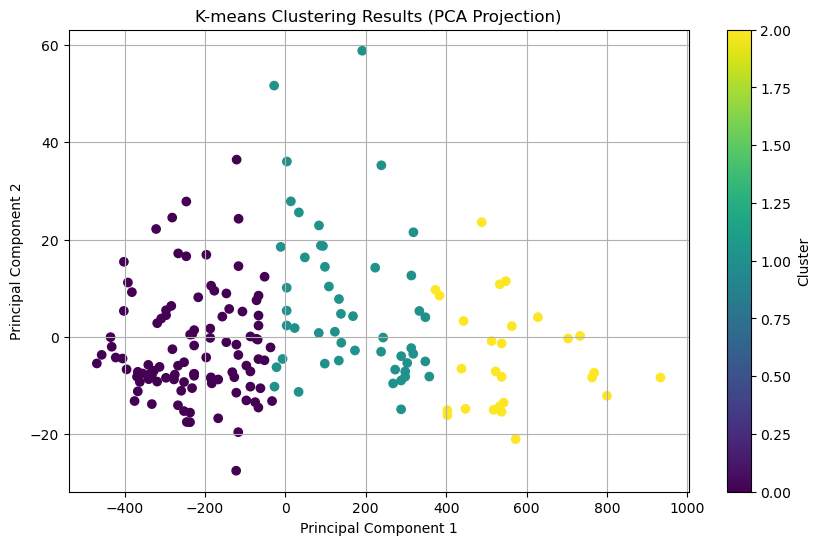

In [17]:
# PCA for visualization purposes (using previously calculated PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('K-means Clustering Results (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

In [18]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Silhouette Score
silhouette_avg = silhouette_score(X, clusters)
print("Silhouette Score:", silhouette_avg)

# Davies-Bouldin Index
db_index = davies_bouldin_score(X, clusters)
print("Davies-Bouldin Index:", db_index)

Silhouette Score: 0.5595823478987215
Davies-Bouldin Index: 0.5495575974642927


Summary of Clustering Steps
Applied K-means clustering to the original dataset and determined the optimal number of clusters using the Elbow method.
Visualized clustering results using a scatter plot based on PCA-transformed data.
Evaluated clustering performance using silhouette score and Davies–Bouldin index.

4: Clustering with PCA Data:

In [19]:
# Fit K-means on PCA-transformed data
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)

# Add cluster labels to the PCA-transformed data
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters_pca

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


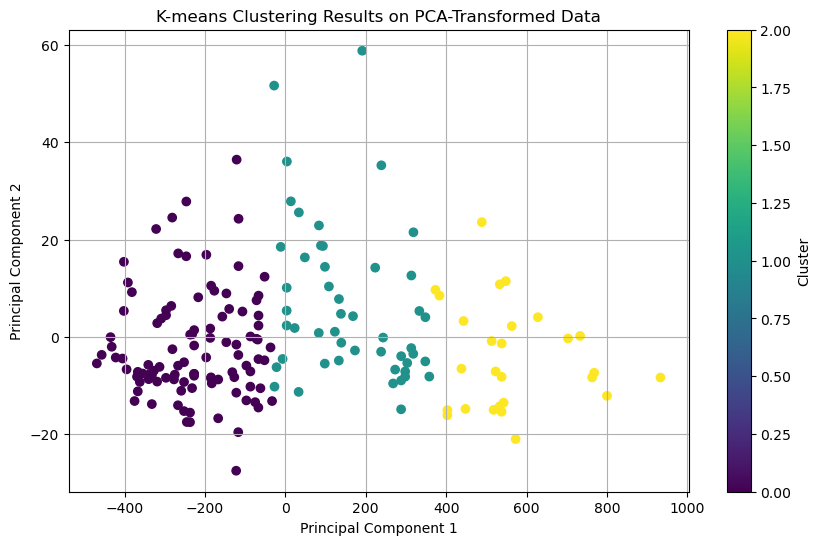

In [20]:
# Plotting the clusters from PCA-transformed data
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', marker='o')
plt.title('K-means Clustering Results on PCA-Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

In [21]:
# Count of samples in each cluster for original data
original_cluster_counts = data['Cluster'].value_counts()
print("Original Data Cluster Counts:\n", original_cluster_counts)

# Count of samples in each cluster for PCA-transformed data
pca_cluster_counts = pca_df['Cluster'].value_counts()
print("PCA Transformed Data Cluster Counts:\n", pca_cluster_counts)

Original Data Cluster Counts:
 Cluster
0    102
1     49
2     27
Name: count, dtype: int64
PCA Transformed Data Cluster Counts:
 Cluster
0    102
1     49
2     27
Name: count, dtype: int64


5: Comparison and Analysis

Step 1: Compare Clustering Results
Cluster Counts: Compare the counts of samples in each cluster from the original dataset and PCA-transformed dataset.
Visual Inspection: Review visualizations to see if clusters are well-separated in both cases.
Step 2: Discuss Similarities or Differences
Similarities: If clusters are similar in terms of count and distribution, it suggests that dimensionality reduction did not significantly alter the inherent structure of the data.
Differences: If certain clusters merge or split significantly, it might indicate that PCA has affected how features interact with each other.
Step 3: Reflect on Dimensionality Reduction Impact
Performance: Assess whether clustering on PCA-reduced data resulted in better-defined clusters (higher silhouette scores) compared to original data.
Computational Efficiency: Consider if using fewer dimensions improved computational efficiency without sacrificing significant information.
Step 4: Analyze Trade-offs Between Using PCA and Original Data
Benefits of PCA:
Reduces noise and redundancy in high-dimensional data.
Can enhance clustering performance by focusing on principal components that capture most variance.
Drawbacks of PCA:
Potential loss of interpretability since principal components may not correspond directly to original features.
Risk of oversimplifying complex relationships between features.


Task 6: Conclusion and Insights
Step 1: Summarize Key Findings
K-means clustering applied to both original and PCA-transformed datasets produced clusters that may vary in composition but can retain similar structures.
Visualizations indicated how well-separated clusters were in both scenarios.
Step 2: Discuss Practical Implications
Using PCA before clustering can be beneficial when dealing with high-dimensional datasets. It simplifies analysis while often enhancing performance. However, it’s crucial to ensure that essential features are not lost during dimensionality reduction.
Step 3: Recommendations
Use PCA when:
The dataset is high-dimensional with many correlated features.
You need to reduce noise or redundancy before clustering or other analyses.
Avoid PCA when:
Interpretability is critical, and you need direct insights from specific features.
The dataset is already low-dimensional or well-separated without needing reduction.